In [635]:
import pandas as pd
import numpy as np


In [636]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv('test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [637]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [638]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [639]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

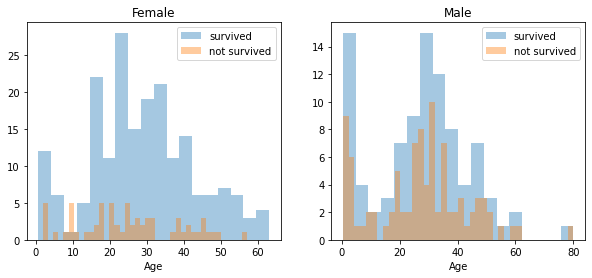

In [640]:
survived='survived'
not_survived='not survived'

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women= train_df[train_df['Sex']=="female"]
men=train_df[train_df['Sex']=="male"]

ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label= survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label= not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label= survived, ax=axes[1], kde=False)
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=40, label= not_survived, ax=axes[1], kde=False)
ax.legend()
_=ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


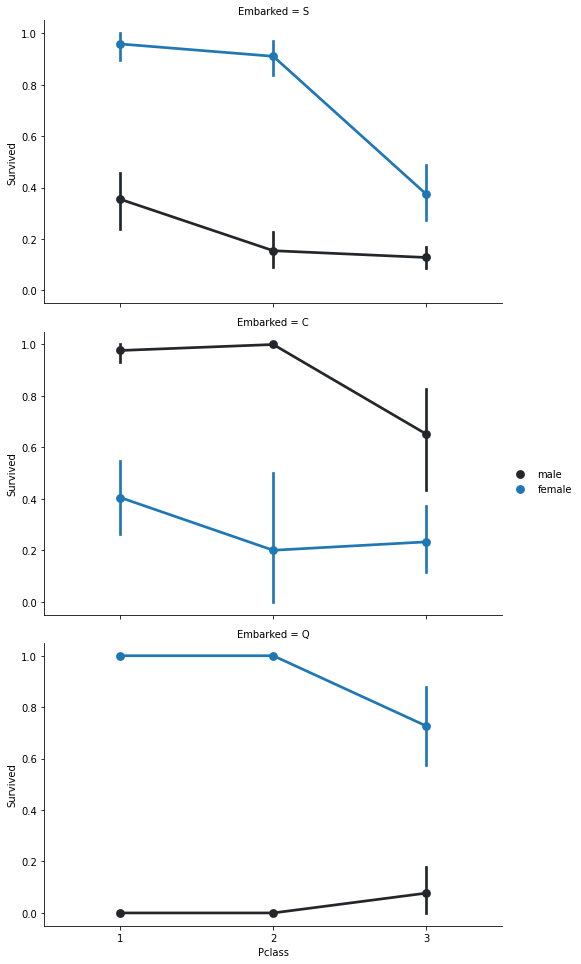

In [641]:
FacetGrid= sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass','Survived','Sex',palette=None, oder=None,hue_order=None)
FacetGrid.add_legend()

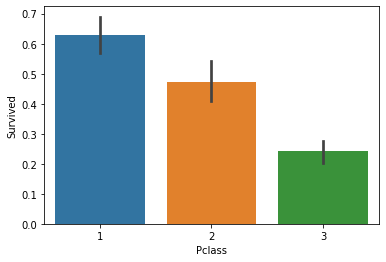

In [642]:
sns.barplot(x='Pclass',y='Survived', data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


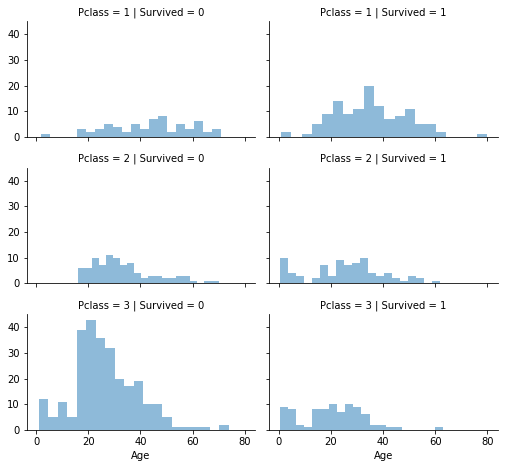

In [643]:
Grid= sns.FacetGrid(train_df, col='Survived',row='Pclass', size=2.2, aspect=1.6)
Grid.map(plt.hist, 'Age',alpha=.5,bins=20)
Grid.add_legend()

([<matplotlib.axis.XTick at 0x7f9bf6757510>,
 [Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')])

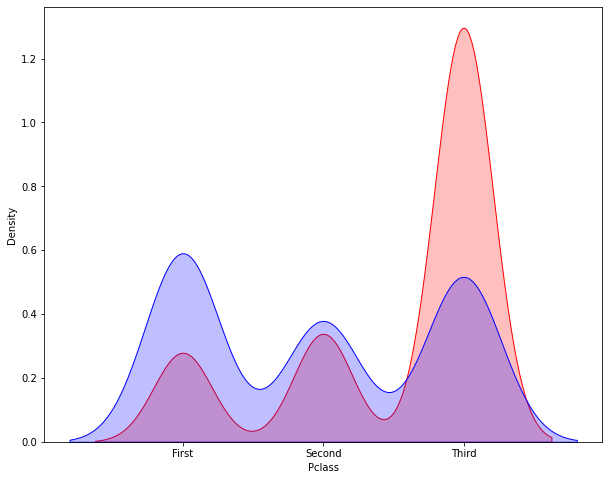

In [644]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train_df.loc[(train_df['Survived']==0),'Pclass'],shade=True,color='r',label='Not Survived')
a=sns.kdeplot(train_df.loc[(train_df['Survived']==1),'Pclass'],shade=True,color='b',label='Survived')
labels=['First','Second','Third']
plt.xticks(sorted(train_df.Pclass.unique()),labels)

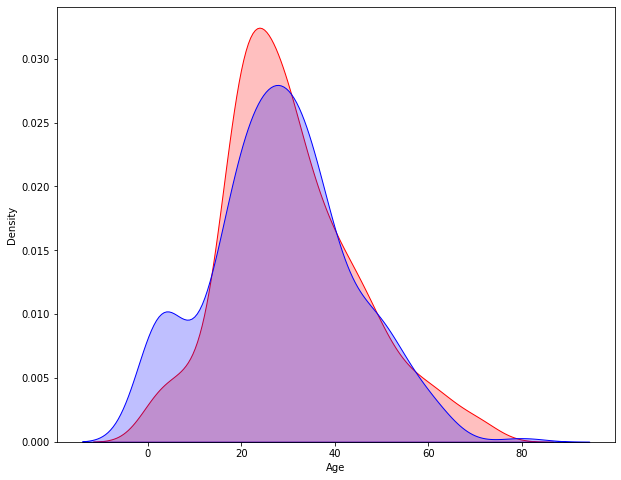

In [645]:
fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(train_df.loc[(train_df['Survived']==0),'Age'],shade=True,color='r',label='Not Survived')
sns.kdeplot(train_df.loc[(train_df['Survived']==1),'Age'],shade=True,color='b',label='Survived')

In [646]:
data=[train_df,test_df]
for dataset in data:
  dataset['relatives']=dataset['SibSp']+dataset['Parch']
  dataset.loc[dataset['relatives']>0, 'not_alone']=0
  dataset.loc[dataset['relatives']==0, 'not_alone']=1
  dataset['not_alone']= dataset['not_alone'].astype(int)

In [647]:
data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [648]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


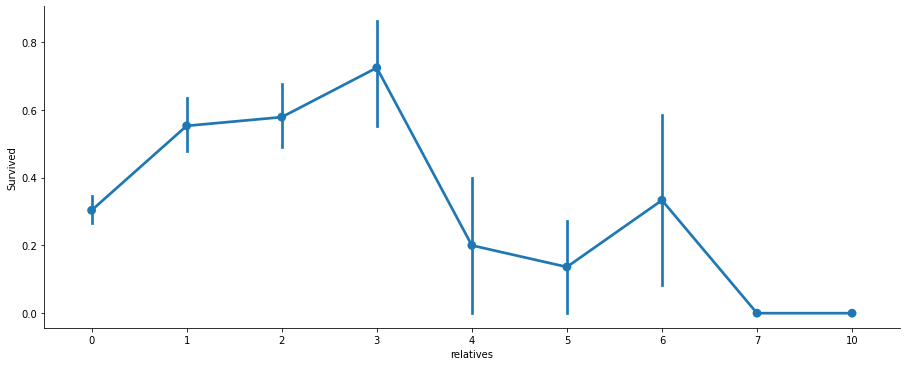

In [649]:
axes=sns.factorplot('relatives','Survived',data=train_df, aspect=2.5)

In [650]:
train_df.drop(['PassengerId'], axis = 1) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [651]:
import re
deck={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}

data=[train_df,test_df]
for dataset in data:
  dataset['Cabin']=dataset['Cabin'].fillna("U0")
  dataset['Deck']=dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck']=dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck']=dataset['Deck'].astype(int)

train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

In [652]:
data=[train_df,test_df]
for dataset in data:
  dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean()) 


In [653]:
data=[train_df,test_df]
for dataset in data:
  print(dataset['Age'] )

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64
0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64


In [654]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [655]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int64  
 13  Deck         891 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


In [656]:
cv='S'
data=[train_df,test_df]
for dataset in data:
  dataset['Embarked']=dataset['Embarked'].fillna(cv)

In [657]:
for dataset in data:
  dataset['Fare']=dataset['Fare'].fillna(0)
  dataset['Fare']=dataset['Fare'].astype(int)

In [658]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int64  
 13  Deck         891 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 97.6+ KB


In [659]:
titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in data:
  dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
  dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  dataset['Title']=dataset['Title'].replace('Mlle','Miss')
  dataset['Title']=dataset['Title'].replace('Ms','Miss')
  dataset['Title']=dataset['Title'].replace('Mme','Mrs')
  dataset['Title']=dataset['Title'].map(titles)
  dataset['Title']=dataset['Title'].fillna(0)

train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)

In [676]:
genders={'male':0,'female':1}

for dataset in data:
  dataset['Sex']=dataset['Sex'].map(genders)

In [677]:
for dataset in data:
  print(dataset['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64


In [662]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [663]:
train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Ticket'], axis=1)

In [664]:
ports={"S":0,"C":1,"Q":2}
data=[train_df,test_df]

for dataset in data:
  dataset['Embarked']=dataset['Embarked'].map(ports)

In [665]:
data=[train_df,test_df]
for dataset in data:
  dataset['Age']=dataset['Age'].astype(int)
  dataset.loc[dataset['Age']<=11, 'Age']=0
  dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18), 'Age']=1
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22), 'Age']=2
  dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27), 'Age']=3
  dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33), 'Age']=4
  dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40), 'Age']=5
  dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66), 'Age']=6
  dataset.loc[dataset['Age']>66, 'Age']=7

In [666]:
for dataset in data:
  dataset.loc[dataset['Fare']<=7.91, 'Fare']=0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare']=1
  dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31), 'Fare']=2
  dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99), 'Fare']=3
  dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250), 'Fare']=4
  dataset.loc[dataset['Fare']>250, 'Fare']=5
  dataset['Fare']=dataset['Fare'].astype(int)

In [667]:
for dataset in data:
  dataset['Age_Class']=dataset['Age']*dataset['Pclass']

In [668]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'not_alone', 'Deck', 'Title',
       'Age_Class'],
      dtype='object')

In [669]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'not_alone', 'Deck', 'Title', 'Age_Class'],
      dtype='object')

In [670]:
data=[train_df,test_df]
for dataset in data:
  dataset['Fare_Per_Person']=dataset['Fare']/(dataset['relatives']+1)
  dataset['Fare_Per_Person']=dataset['Fare_Per_Person'].astype(int)

**Model Phase**

In [671]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [679]:
independent_var=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives', 'not_alone',]
dat=train_df[independent_var]
label=train_df.Fare
dat.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone
0,0,3,0,2,1,0,0,1,0
1,1,1,1,5,1,0,3,1,0
2,1,3,1,3,0,0,0,0,1
3,1,1,1,5,1,0,3,1,0
4,0,3,0,5,0,0,1,0,1


In [680]:
x=dat.drop('Survived',axis=1)
y=dat['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

**Logistic Regression**

In [681]:
regressor=LogisticRegression()


In [682]:
regressor.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [683]:
predictions = regressor.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
acc_Logistic_Regression= round(regressor.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



**SVM**

In [684]:
from sklearn.svm import SVC,LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(x_train,y_train)
y_pred=linear_svc.predict(x_test)
print(classification_report(y_test, y_pred))
acc_SVM= round(linear_svc.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       154
           1       0.80      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Random Forest Classifier**

In [685]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier(n_estimators=100)
rand_forest.fit(x_train,y_train)
y_predict=rand_forest.predict(x_test)
print(classification_report(y_test, y_predict))
acc_random_forest= round(rand_forest.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       154
           1       0.86      0.72      0.78       114

    accuracy                           0.83       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.84      0.83      0.83       268



**KNN**

In [686]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_prediction=knn.predict(x_test)
print(classification_report(y_test, y_prediction))
acc_KNN= round(knn.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       154
           1       0.80      0.72      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



**Naive Bayes**

In [687]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_test)
print(classification_report(y_test, y_pred))
acc_gaussian= round(gaussian.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       154
           1       0.72      0.71      0.71       114

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



**Perceptron**

In [688]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron(max_iter=10)
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
print(classification_report(y_test, y_pred))
acc_perceptron= round(perceptron.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       154
           1       0.90      0.47      0.62       114

    accuracy                           0.75       268
   macro avg       0.81      0.72      0.72       268
weighted avg       0.79      0.75      0.73       268



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


**Stochastic Gradient Decent**

In [689]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(max_iter=5,tol=None)
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
print(classification_report(y_test, y_pred))
acc_SGD= round(SGD.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       154
           1       0.71      0.72      0.71       114

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268



**Decision Tree**

In [690]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_pred=decision.predict(x_test)
print(classification_report(y_test, y_pred))
acc_decision_tree= round(decision.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       154
           1       0.85      0.72      0.78       114

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.82      0.82       268



In [691]:
results=pd.DataFrame({
    'Model':['Support Vector Machines','KNN','Logistic Regression','Random Forest','Naive Bayes','Perceptron',
             'Stochastic Gradient Decent','Decision Tree'],
    'Score':[acc_SVM,acc_KNN,acc_Logistic_Regression,acc_random_forest,acc_gaussian,acc_perceptron,
             acc_SGD,acc_decision_tree]
})

result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

,Model
Score,
89.41,Random Forest
89.41,Decision Tree
87.00,KNN
81.70,Logistic Regression
80.90,Support Vector Machines
78.17,Naive Bayes
76.08,Perceptron
75.92,Stochastic Gradient Decent


best model for this dataset = Random Forest

**Model Evaluation** 

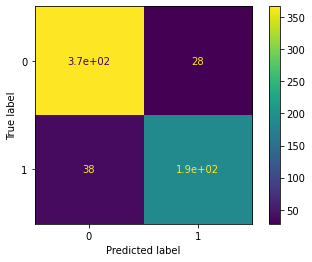

In [692]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rand_forest,x_train,y_train)

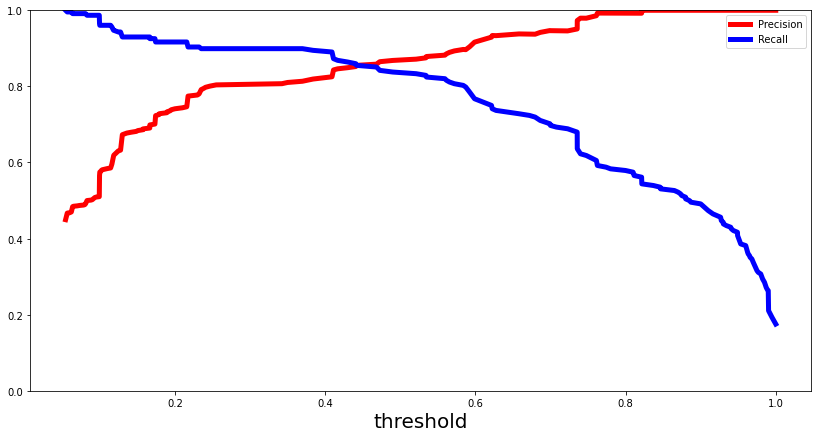

In [693]:
from sklearn.metrics import precision_recall_curve

y_scores=rand_forest.predict_proba(x_train)
y_scores=y_scores[:,1]

precision,recall,threshold=precision_recall_curve(y_train,y_scores)

def plot_precision_recall(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],'r-',label='Precision',linewidth=5)
    plt.plot(threshold,recall[:-1],'b',label='Recall',linewidth=5)
    plt.xlabel('threshold',fontsize=20)
    plt.legend()
    plt.ylim([0,1])

plt.figure(figsize=(14,7))
plot_precision_recall(precision,recall,threshold)


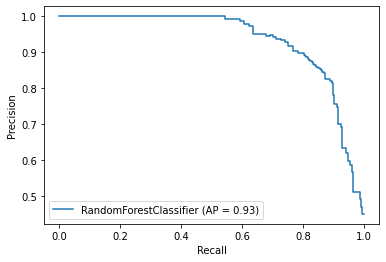

In [694]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rand_forest,x_train,y_train)



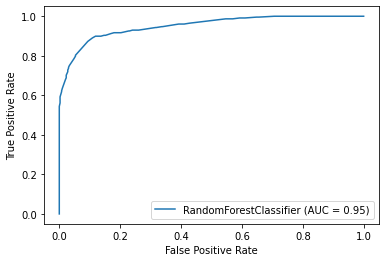

In [695]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rand_forest,x_train,y_train)